Refer to

<https://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot>

for the available options to animate graphs with matplotlib animation in Jupyter notebooks.

In [1]:
%matplotlib notebook


# The double pendulum problem


This animation illustrates the double pendulum problem.

Double pendulum formula translated from the C code at
http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c



<IPython.core.display.Javascript object>


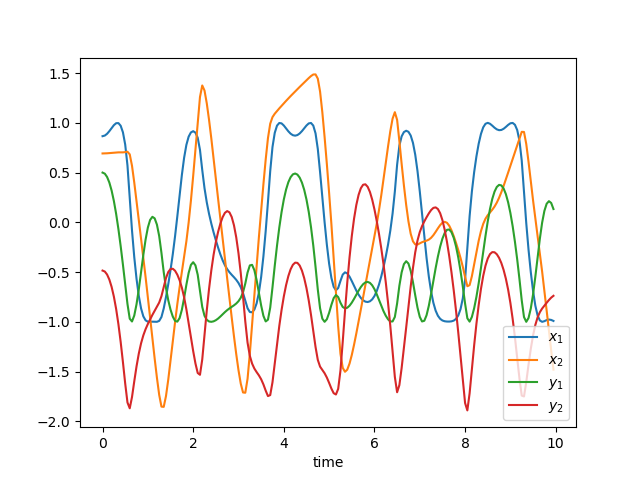

In [2]:
#%matplotlib notebook
# (a bug requires the repetition)

from numpy import *
from matplotlib import rcParams
import matplotlib.pyplot as pp
import scipy.integrate as integrate
import matplotlib.animation as animation
import matplotlib.patches as patches
from IPython.display import HTML

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def fun(t, state):
    dydx = zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx


# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1_0 = 120.0
om1_0 = 0.0
th2_0 = -10.0
om2_0 = 0.0

# initial state
y0 = radians([th1_0, om1_0, th2_0, om2_0])
t_span = [0.0, 10.0]

# integrate your ODE using scipy.integrate.
y = integrate.solve_ivp(fun=fun, t_span=t_span, y0=y0, dense_output=True)

# Sample the result at 20 frames / sec
dt = 1.0 / 20.0
t = arange(t_span[0], t_span[1], dt)
th1, om1, th2, om2 = y["sol"](t)

x1 = L1*sin(th1)
y1 = -L1*cos(th1)

x2 = L2*sin(th2) + x1
y2 = -L2*cos(th2) + y1

pp.figure()
pp.xlabel("time")
pp.plot(t, x1, label="$x_1$")
pp.plot(t, x2, label="$x_2$")
pp.plot(t, y1, label="$y_1$")
pp.plot(t, y2, label="$y_2$")
pp.legend()

<IPython.core.display.Javascript object>


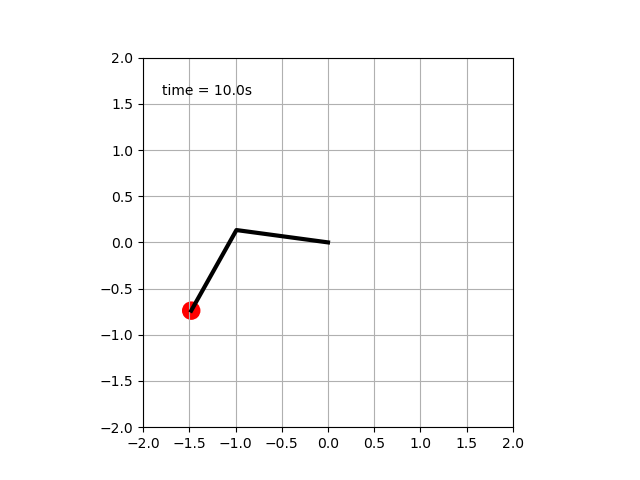

In [3]:
fig = pp.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], "k", lw=3)
circle = patches.Circle([0.0, 0.0], radius=0.1, fc="r")
ax.add_artist(circle)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, circle, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    
    line.set_data(thisx, thisy)
    circle.center = [x2[i], y2[i]]
    time_text.set_text(time_template % (i*dt))
    
    return line, circle, time_text


anim = animation.FuncAnimation(fig, animate, range(0, len(t)),
                              interval=dt*1000, blit=True, init_func=init, repeat=False)
